In [ ]:
# Compare DBSCAN and KMeans clustering algorithms on the make_moons dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import adjusted_rand_score

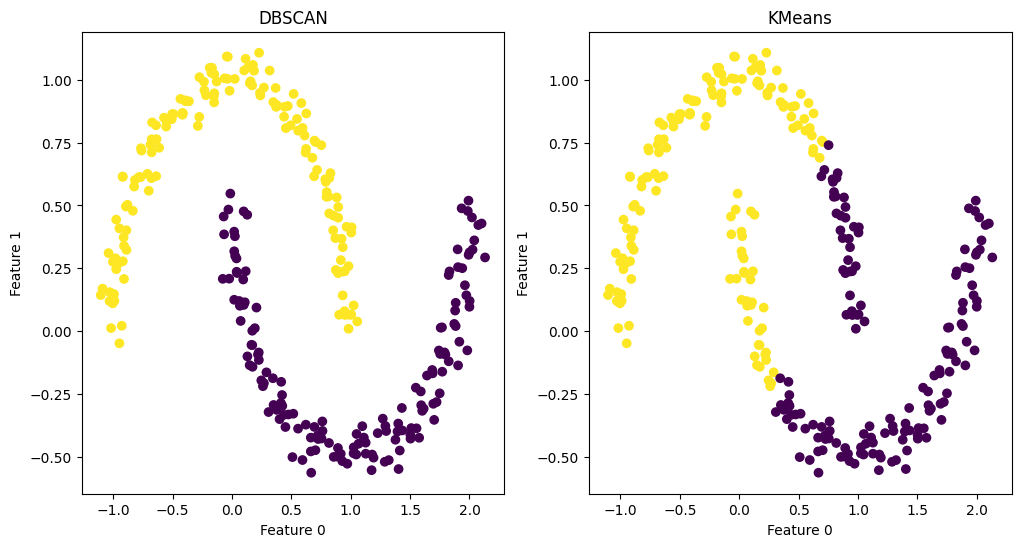

In [6]:
# Generate the dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.2)
y_dbscan = dbscan.fit_predict(X)

# Cluster the data using KMeans
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

# Plot the data
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title('DBSCAN')
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.subplot(122)
plt.title('KMeans')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

In [7]:
import math

# Define the list of points (labeled as given)
points = {
    'A1': (1, 2),
    'A2': (0, 0),
    'A3': (0, 1),
    'A4': (1, 5),
    'A5': (2, 5),
    'A6': (4, 5),
    'A7': (12, 1),
    'A8': (11, 2),
    'A9': (30, 2)
}

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def dbscan(points_dict, eps, min_pts):
    # First, find the epsilon neighborhood for each point
    neighborhoods = {}
    for label, point in points_dict.items():
        neighbors = []
        for other_label, other_point in points_dict.items():
            if euclidean_distance(point, other_point) <= eps:
                neighbors.append(other_label)
        neighborhoods[label] = neighbors

    # Identify core points: points with at least min_pts neighbors (including itself)
    core_points = {label for label, neighbors in neighborhoods.items() if len(neighbors) >= min_pts}
    
    # Border points: Not core but in the epsilon neighborhood of at least one core point
    border_points = set()
    for label, neighbors in neighborhoods.items():
        if label not in core_points:
            for neighbor in neighbors:
                if neighbor in core_points:
                    border_points.add(label)
                    break
    
    # Noise points: neither core nor border
    noise_points = set(points_dict.keys()) - core_points - border_points
    
    return core_points, border_points, noise_points

# Case (a): eps = 1.2, min_pts = 3
eps_a = 1.2
min_pts_a = 3
core_a, border_a, noise_a = dbscan(points, eps_a, min_pts_a)

print("Case (a): eps = 1.2, min_pts = 3")
print("Core points:", sorted(core_a))
print("Border points:", sorted(border_a))
print("Noise points:", sorted(noise_a))
print()

# Case (b): eps = 2, min_pts = 4
eps_b = 2
min_pts_b = 4
core_b, border_b, noise_b = dbscan(points, eps_b, min_pts_b)

print("Case (b): eps = 2, min_pts = 4")
print("Core points:", sorted(core_b))
print("Border points:", sorted(border_b))
print("Noise points:", sorted(noise_b))


Case (a): eps = 1.2, min_pts = 3
Core points: []
Border points: []
Noise points: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

Case (b): eps = 2, min_pts = 4
Core points: []
Border points: []
Noise points: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']


Case (a): eps = 1.2, min_pts = 3
Core points: []
Border points: []
Noise points: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']


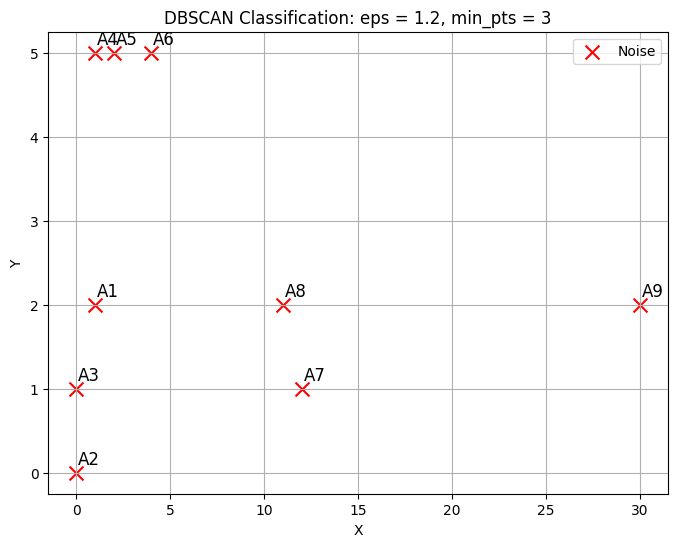


Case (b): eps = 2, min_pts = 4
Core points: []
Border points: []
Noise points: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']


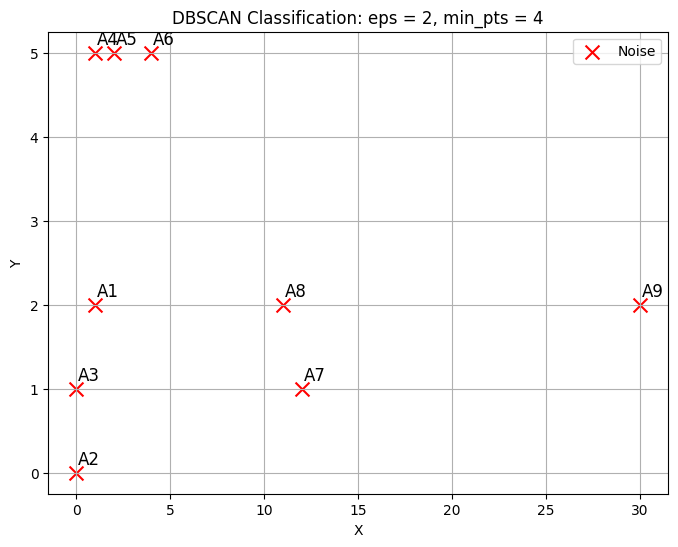

In [8]:
import math
import matplotlib.pyplot as plt

# Define the list of points with labels.
points = {
    'A1': (1, 2),
    'A2': (0, 0),
    'A3': (0, 1),
    'A4': (1, 5),
    'A5': (2, 5),
    'A6': (4, 5),
    'A7': (12, 1),
    'A8': (11, 2),
    'A9': (30, 2)
}

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def dbscan(points_dict, eps, min_pts):
    # Compute the epsilon-neighborhood for each point.
    neighborhoods = {}
    for label, point in points_dict.items():
        neighbors = []
        for other_label, other_point in points_dict.items():
            if euclidean_distance(point, other_point) <= eps:
                neighbors.append(other_label)
        neighborhoods[label] = neighbors

    # Identify core points: points with at least min_pts neighbors (including itself).
    core_points = {label for label, neighbors in neighborhoods.items() if len(neighbors) >= min_pts}
    
    # Border points: not core but in the neighborhood of at least one core point.
    border_points = set()
    for label, neighbors in neighborhoods.items():
        if label not in core_points:
            for neighbor in neighbors:
                if neighbor in core_points:
                    border_points.add(label)
                    break
    
    # Noise points: points that are neither core nor border.
    noise_points = set(points_dict.keys()) - core_points - border_points
    
    return core_points, border_points, noise_points

def plot_points(points_dict, core, border, noise, title):
    plt.figure(figsize=(8,6))
    
    # Prepare coordinates lists for each classification.
    if core:
        core_coords = [points_dict[label] for label in core]
        x_core, y_core = zip(*core_coords)
        plt.scatter(x_core, y_core, c='blue', marker='o', s=100, label='Core')
    if border:
        border_coords = [points_dict[label] for label in border]
        x_border, y_border = zip(*border_coords)
        plt.scatter(x_border, y_border, c='green', marker='s', s=100, label='Border')
    if noise:
        noise_coords = [points_dict[label] for label in noise]
        x_noise, y_noise = zip(*noise_coords)
        plt.scatter(x_noise, y_noise, c='red', marker='x', s=100, label='Noise')
    
    # Annotate each point with its label.
    for label, (x, y) in points_dict.items():
        plt.text(x + 0.1, y + 0.1, label, fontsize=12)
        
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------------
# Case (a): eps = 1.2, min_pts = 3
eps_a = 1.2
min_pts_a = 3
core_a, border_a, noise_a = dbscan(points, eps_a, min_pts_a)

print("Case (a): eps = 1.2, min_pts = 3")
print("Core points:", sorted(core_a))
print("Border points:", sorted(border_a))
print("Noise points:", sorted(noise_a))
plot_points(points, core_a, border_a, noise_a, "DBSCAN Classification: eps = 1.2, min_pts = 3")

# ------------------------------
# Case (b): eps = 2, min_pts = 4
eps_b = 2
min_pts_b = 4
core_b, border_b, noise_b = dbscan(points, eps_b, min_pts_b)

print("\nCase (b): eps = 2, min_pts = 4")
print("Core points:", sorted(core_b))
print("Border points:", sorted(border_b))
print("Noise points:", sorted(noise_b))
plot_points(points, core_b, border_b, noise_b, "DBSCAN Classification: eps = 2, min_pts = 4")


Case (a): eps = 1.2, min_pts = 3
Core points: ['A10', 'A5']
Border points: ['A4', 'A6']
Noise points: ['A1', 'A2', 'A3', 'A7', 'A8', 'A9']


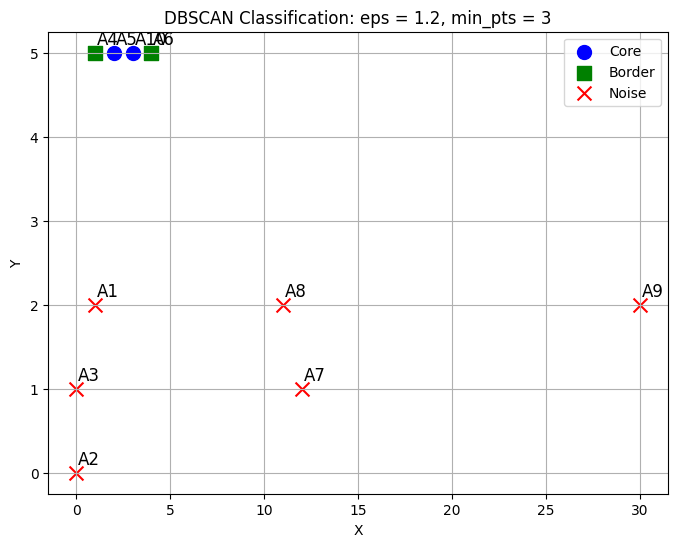


Case (b): eps = 2, min_pts = 4
Core points: ['A10', 'A5']
Border points: ['A4', 'A6']
Noise points: ['A1', 'A2', 'A3', 'A7', 'A8', 'A9']


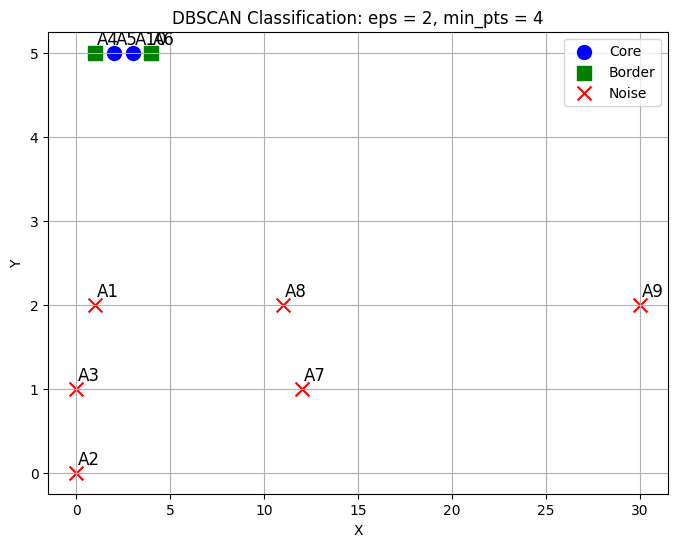

In [9]:
import math
import matplotlib.pyplot as plt

# Define the list of points with labels.
points = {
    'A1': (1, 2),
    'A2': (0, 0),
    'A3': (0, 1),
    'A4': (1, 5),
    'A5': (2, 5),
    'A6': (4, 5),
    'A7': (12, 1),
    'A8': (11, 2),
    'A9': (30, 2),
    'A10': (3, 5)
}

def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def dbscan(points_dict, eps, min_pts):
    # Compute the epsilon-neighborhood for each point.
    neighborhoods = {}
    for label, point in points_dict.items():
        neighbors = []
        for other_label, other_point in points_dict.items():
            if euclidean_distance(point, other_point) <= eps:
                neighbors.append(other_label)
        neighborhoods[label] = neighbors

    # Identify core points: points with at least min_pts neighbors (including itself).
    core_points = {label for label, neighbors in neighborhoods.items() if len(neighbors) >= min_pts}
    
    # Border points: not core but in the epsilon neighborhood of at least one core point.
    border_points = set()
    for label, neighbors in neighborhoods.items():
        if label not in core_points:
            for neighbor in neighbors:
                if neighbor in core_points:
                    border_points.add(label)
                    break
    
    # Noise points: points that are neither core nor border.
    noise_points = set(points_dict.keys()) - core_points - border_points
    
    return core_points, border_points, noise_points

def plot_points(points_dict, core, border, noise, title):
    plt.figure(figsize=(8,6))
    
    # Plot core points
    if core:
        core_coords = [points_dict[label] for label in core]
        x_core, y_core = zip(*core_coords)
        plt.scatter(x_core, y_core, c='blue', marker='o', s=100, label='Core')
        
    # Plot border points
    if border:
        border_coords = [points_dict[label] for label in border]
        x_border, y_border = zip(*border_coords)
        plt.scatter(x_border, y_border, c='green', marker='s', s=100, label='Border')
        
    # Plot noise points
    if noise:
        noise_coords = [points_dict[label] for label in noise]
        x_noise, y_noise = zip(*noise_coords)
        plt.scatter(x_noise, y_noise, c='red', marker='x', s=100, label='Noise')
    
    # Annotate points with their labels.
    for label, (x, y) in points_dict.items():
        plt.text(x + 0.1, y + 0.1, label, fontsize=12)
        
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------------
# Case (a): eps = 1.2, min_pts = 3
eps_a = 1.2
min_pts_a = 3
core_a, border_a, noise_a = dbscan(points, eps_a, min_pts_a)

print("Case (a): eps = 1.2, min_pts = 3")
print("Core points:", sorted(core_a))
print("Border points:", sorted(border_a))
print("Noise points:", sorted(noise_a))
plot_points(points, core_a, border_a, noise_a, "DBSCAN Classification: eps = 1.2, min_pts = 3")

# ------------------------------
# Case (b): eps = 2, min_pts = 4
eps_b = 2
min_pts_b = 4
core_b, border_b, noise_b = dbscan(points, eps_b, min_pts_b)

print("\nCase (b): eps = 2, min_pts = 4")
print("Core points:", sorted(core_b))
print("Border points:", sorted(border_b))
print("Noise points:", sorted(noise_b))
plot_points(points, core_b, border_b, noise_b, "DBSCAN Classification: eps = 2, min_pts = 4")
